# Parking Lot Recognition (CNN)
(1) 모델 학습 및 평가

데이터 및 원본 코드 출처: <https://www.kaggle.com/kageyama/keras-car-park-recognition-cnn>  
추가 데이터 출처 : <https://www.kaggle.com/blanderbuss/parking-lot-dataset>

## Preprocessing

In [1]:
# import required packages
import os
import cv2
import random
import numpy as np
from tqdm import tqdm
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# directory
current_path = os.getcwd()
data_DIR = os.path.join(current_path, 'data')
output_DIR = os.path.join(current_path, 'output')

Free_DIR = os.path.join(data_DIR, 'Free')
Full_DIR = os.path.join(data_DIR, 'Full')

In [3]:
# setting
img_size = 150

X = [] # store image array
Z = [] # store image label

In [4]:
def assign_label(img, label):
    # return label of image file
    return label


def img_load(X, Z, label, DIR):
    # load image file in color and return to np.array
    
    # list files in directory to access
    for img in tqdm(os.listdir(DIR)):
        label = assign_label(img, label)   # assign label
        file_path = os.path.join(DIR, img) # compose path
        
        img = cv2.imread(file_path, cv2.IMREAD_COLOR) # load image
        img = cv2.resize(img, (img_size, img_size))   # resize image
        
        X.append(np.array(img)) # return image as np.array
        Z.append(str(label))    # return image label

`tqdm()` : `for ~ in`문과 함께 사용하며 진행상태바 표시

`os.listdir()` : 지정 디렉토리의 모든 파일을 리스트로 반환

`cv2.imread(DIR, flag)` : 이미지 파일 불러오기
- `flag` : 이미지 파일 옵션
    - `cv2.IMREAD_COLOR` : 컬러 (디폴트)
    - `cv2.IMREAD_GRAYSCALE` : 그레이 스케일
    - `cv2.IMREAD_UNCHANGED` : 이미지 파일의 aplha channel까지 포함해 읽기

In [5]:
# load data
img_load(X, Z, 'Free', Free_DIR)
print(len(X))

img_load(X, Z, 'Full', Full_DIR)
print(len(X))

  0%|          | 3/2195 [00:00<01:14, 29.41it/s]

1067


100%|██████████| 2195/2195 [01:38<00:00, 22.37it/s]

3262


In [6]:
# data shape
np.asarray(X).shape

(3262, 150, 150, 3)

`np.array()`, `np.asarray()` : ndarray 배열 생성
- `np.array()`는 원본 ndarray를 복사하여 새로운 메모리 차지
- `np.asarray()`는 데이터타입이 같은 경우 메모리 차지하지 않음

In [7]:
# image size
print('전체 이미지 수:', np.asarray(X).shape[0])
print('세로:', np.asarray(X).shape[1])
print('가로:', np.asarray(X).shape[2])
print('채널:', np.asarray(X).shape[3])

전체 이미지 수: 3262
세로: 150
가로: 150
채널: 3


In [8]:
# check X
print('전체 이미지 수:', len(X))
print('세로:', len(X[1]))
print('가로:', len(X[1][1]))
print('세로x가로 첫번째 픽셀값:', X[1][1][1]) # pixcel values for each color channels (RGB)

전체 이미지 수: 3262
세로: 150
가로: 150
세로x가로 첫번째 픽셀값: [ 99  89 112]


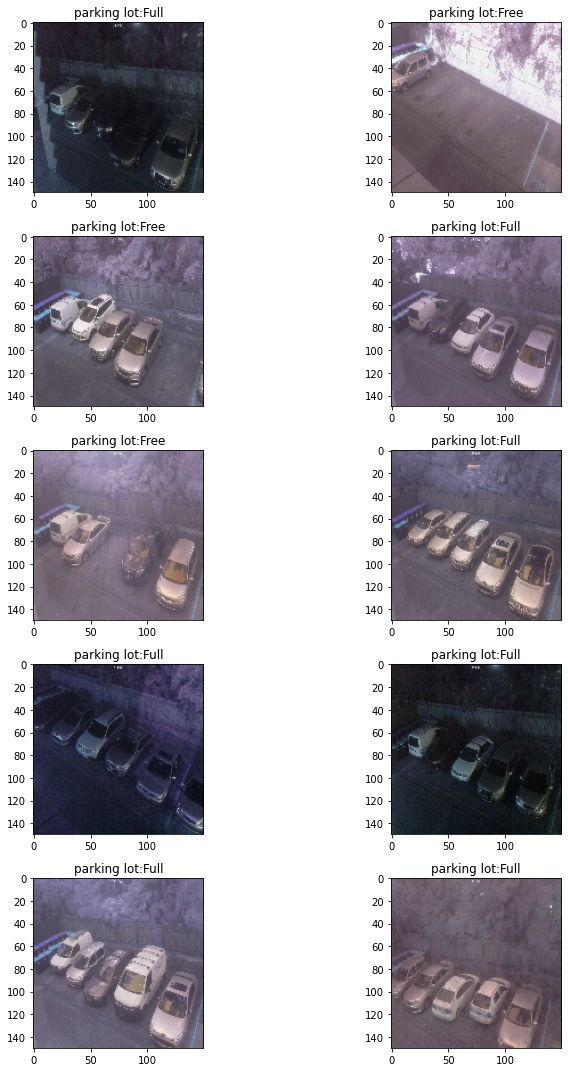

In [9]:
# check 10 random images
fig, ax = plt.subplots(5, 2)
fig.set_size_inches(12, 15)

for i in range(5):
    for j in range(2):
        num = random.randint(0, len(X)) # select random image number
        
        ax[i, j].imshow(X[num])                   # load image
        ax[i, j].set_title('parking lot:'+Z[num]) # attach label

plt.tight_layout()

`random.randint(min, max)` : 최소값과 최댓값 사이의 무작위 정수 반환

`imshow()` : 사이즈에 맞게 이미지 출력

In [10]:
# label encoder
le = LabelEncoder()
Y = le.fit_transform(Z)
Y = to_categorical(Y, 2)

`LabelEncoder()` : 문자를 0부터 시작하는 정수형으로 매칭
- ex. Free (`0`), Full (`1`)

`to_categorical(data, num_classes)` : 클래스 수만큼 카테고리 생성

In [11]:
# convert X
X = np.array(X) # copy
X = X/255       # convert values into range 0~1

`X = X/255`
- 각 픽셀은 8비트로, 2⁸=256개의 값 중 하나 (0 ~ 255)를 가짐
- 픽셀값을 255로 나누어 0~1 사이의 실수로 반환

In [12]:
# data partition
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.3, random_state=1)

In [13]:
# fix random seed
np.random.seed(0)
random.seed(0)
tf.random.set_seed(0)

## CNN

In [14]:
# import required packages
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Activation, Dense, Dropout
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

In [15]:
# CNN modeling
# stack convolution layer and pooling layer
model = Sequential()

# layer1
model.add(Conv2D(filters=32,
                 kernel_size=(5, 5),
                 padding='Same',
                 activation='relu',
                 input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# layer2
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 padding='Same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

# layer3
model.add(Conv2D(filters=96,
                 kernel_size=(3, 3),
                 padding='Same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

# layer4
model.add(Conv2D(filters=96,
                 kernel_size=(3, 3),
                 padding='Same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.3))  # add dropout to prevent overfitting
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(2, activation='softmax'))

`Sequential()` : 순차적으로 레이어를 더하는 모델 생성
- `add()` : 레이어 추가

`Con2D()` : convolution layer 생성
- `filters` : 필터의 개수
- `kernel_size` : 필터의 크기
- `padding` : 경계 처리 방법
    - `padding='same'` : 출력 이미지 사이즈가 입력 이미지 사이즈와 동일
    - `padding='valid'` : 유효한 영역만 출력
- `activation` : 활성화함수 지정
- `input_shape(row, column, channel)` : 입력 형태 정의

`MaxPooling2D()` : max pooling layer 생성
- `strides` : 필터가 순회하는 간격 지정
- `pool_size` : 수직, 수평 축소 비율 지정. 보통 stride와 같은 크기 사용

`Flatten()` : convolution layer와 pooling layer를 거친 2차원 자료를 1차원 자료로 변환
    
`Dense(n)` : 1차원 자료를 입력받아 n개의 출력으로 분류 수행

In [16]:
# use callback to increase learning rate
red_lr = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.1)

`ReduceLROnPlateau()` : 학습률이 개선되지 않을 때 학습률을 동적으로 조정하여 학습률을 개선하는 방법 (callback)
- `monitor='val_acc'` : 검증 손실을 기준으로 callback 호출
- `patience` : 지정된 epoch 동안 성능 향상이 일어나지 않으면 callback 호출
- `verbose=1` : Verbosity mode
    - `verbose=0` : silent
    - `verbose=1` : progress bar
    - `verbose=2` : one line per epoch
- `min_lr` : 학습률의 하한 지정
- `factor` : 학습률 조정에 사용되는 값 (새로운 학습률 = factor*기존 학습률)
    - 일반적으로 0.1 ~ 0.2 사용

In [17]:
# data augmentation to prevent overfitting
datagen = ImageDataGenerator(featurewise_center=False,            #set input mean to 0 over the dataset
                             samplewise_center=False,             #set each sample mean to 0
                             featurewise_std_normalization=False, #divide inputs by std of the dataset
                             samplewise_std_normalization=False,  #divide each input by its std
                             zca_whitening=False,                 #apply ZCA whitening
                             rotation_range=10,                   #randomly rotate images
                             zoom_range = 0.1,                    #Randomly zoom image
                             width_shift_range=0.2,               #randomly shift images horizontally
                             height_shift_range=0.2,              #randomly shift images vertically
                             horizontal_flip=True,                #randomly flip images
                             vertical_flip=False)                 #randomly flip images

datagen.fit(X_train)

`ImageDataGenerator` : 데이터 증강 (agumentation)을 사용하여 해서 텐서 이미지 데이터 배치 생성
- `featurewise_center` : 특성별로 입력의 평균이 0이 되도록 함
- `samplewise_center` : 각 샘플의 평균이 0이 되도록 함
- `featurewise_std_normalization` : 입력을 각 특성 내에서 데이터셋의 표준편차로 나눔
- `samplewise_std_normalization` : 각 입력을 표준편차로 나눔
- `zca_whitening` : 영위상 성분분석 백색화를 적용할지 여부
- `rotation_range` : 무작위 회전의 각도 범위
- `zoom_range` : 무작위 확대의 범위로, 부동소수점인 경우 [1-zoom_range, 1+zoom_range]
- `width_shift_range`
    - 부동소수점이 `< 1`일 때 전체 가로 넓이에서의 비율
    - 부동소수점이 `>= 1`일 때 픽셀의 개수
- `height_shift_range`
    - 부동소수점이 `< 1`일 때 전체 세로 넓이에서의 비율
    - 부동소수점이 `>= 1`일 때 픽셀의 개수
- `horizontal_flip` : input을 무작위로 가로로 뒤집음
- `vertical_flip` : input을 무작위로 세로로 뒤집음

In [18]:
# compiling model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

`compile()` : 모델 학습 전, 학습 방식에 대한 환경설정 생성
- `optimizer` : 정규화 알고리즘
- `loss` : 가중치를 평가하기 위한 손실 함수
    - `loss='categorical_crossentropy'` : 다중 분류 문제에 사용
- `metrics` : 평가 척도
    - `metrics=['accuracy']` : 일반적으로 분류 문제에서는 accuracy 지정

In [19]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 96)        8

## Training

In [20]:
# training conditions
batch_size = 128
epochs = 30

In [21]:
# training
History = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                              epochs=epochs,
                              validation_data=(X_valid, y_valid),
                              verbose=1,
                              steps_per_epoch=X_train.shape[0]//batch_size)

/Users/samantha/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
17/17 [==============================] - 131s 7s/step - loss: 0.7886 - accuracy: 0.6839 - val_loss: 0.6078 - val_accuracy: 0.6159
Epoch 2/30
17/17 [==============================] - 126s 7s/step - loss: 0.5976 - accuracy: 0.6627 - val_loss: 0.5858 - val_accuracy: 0.6599
Epoch 3/30
17/17 [==============================] - 152s 9s/step - loss: 0.5714 - accuracy: 0.6886 - val_loss: 0.5433 - val_accuracy: 0.6731
Epoch 4/30
17/17 [==============================] - 128s 8s/step - loss: 0.5492 - accuracy: 0.7119 - val_loss: 0.5200 - val_accuracy: 0.7518
Epoch 5/30
17/17 [==============================] - 122s 7s/step - loss: 0.5218 - accuracy: 0.7417 - val_loss: 0.4810 - val_accuracy: 0.7845
Epoch 6/30
17/17 [==============================] - 98s 6s/step - loss: 0.5577 - accuracy: 0.7295 - val_loss: 0.5224 - val_accuracy: 0.7283
Epoch 7/30
17/17 [==============================] - 103s 6s/step - loss: 0.5225 - accuracy: 0.7475 - val_loss: 0.4480 - val_accuracy: 0.8069
Epoch 8/30
17/

`flow()` : 데이터와 라벨 배열을 받아 증강된 데이터의 배치 생성
- `x` : numpy 형태의 입력 데이터
- `y` : 라벨
- `batch_size` : 생성할 배치의 크기 (default=32)

`fit_generator()` : ImageDataGenerator로 생성한 배치 학습 (fit X)
- `첫번째 인자` : 훈련 데이터셋을 제공할 generator 지정
- `steps_per_epoch` : epoch 학습 시 사용할 반복 횟수 (=training size/batch size)

In [ ]:
# save model
model.save(output_DIR+'/cnn1.h5')

## Evaluation

In [22]:
# import required packages
import warnings
warnings.filterwarnings('always', 'ignore')

`filterwarnings()` : 특정 타입의 경고에 대한 필터를 추가
- `'always'` : 경고 메세지 항상 출력
- `'ignore'` : 경고 메세지 무시하기

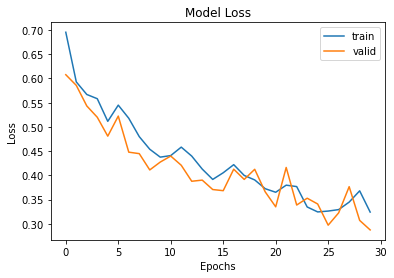

In [23]:
# loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'valid'])
plt.show()

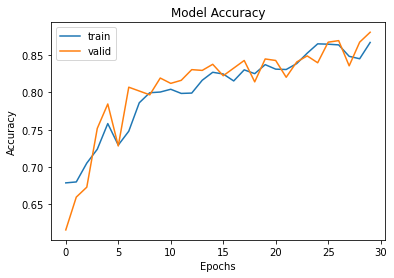

In [24]:
# accuracy
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'valid'])
plt.show()

In [25]:
# accuracy and loss
print('Accuracy: {:.2f}'.format(History.history['accuracy'][9]))
print('Loss: {:.2f}'.format(History.history['loss'][9]))

Accuracy: 0.80
Loss: 0.44


In [26]:
# predict valid set
pred = model.predict(X_valid)
pred_digits = np.argmax(pred, axis=1)

`np.argmax` : 다차원 배열의 경우 차원에 따라 가장 큰 값의 인덱스 반환

In [27]:
# classified indexes
i = 0
acc = 0
prop_class = []
mis_class = []

for i in range(len(y_valid)):
    if(np.argmax(y_valid[i]) == pred_digits[i]):  # if actual and prection has same index
        prop_class.append(i)                      # predicted properly
        acc += 1                                  # count
    else:
        mis_class.append(i)                       # predicted wrong

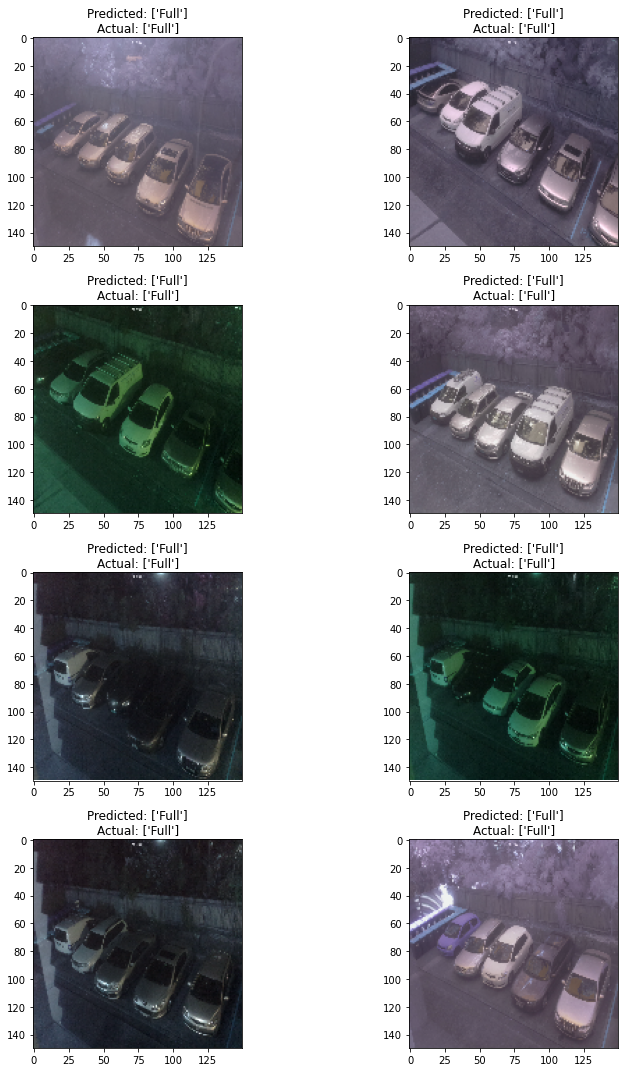

In [28]:
# predicted properly (show 8 images)
warnings.filterwarnings('always', 'ignore')

count = 0
fig, ax = plt.subplots(4, 2)
fig.set_size_inches(12, 15)
for i in range (4):
    for j in range (2):
        ax[i, j].imshow(X_valid[prop_class[count]])
        ax[i, j].set_title("Predicted: "+str(le.inverse_transform([pred_digits[prop_class[count]]]))
                           +"\nActual: "+str(le.inverse_transform([np.argmax([y_valid[prop_class[count]]])])))
        count += 1
plt.tight_layout()

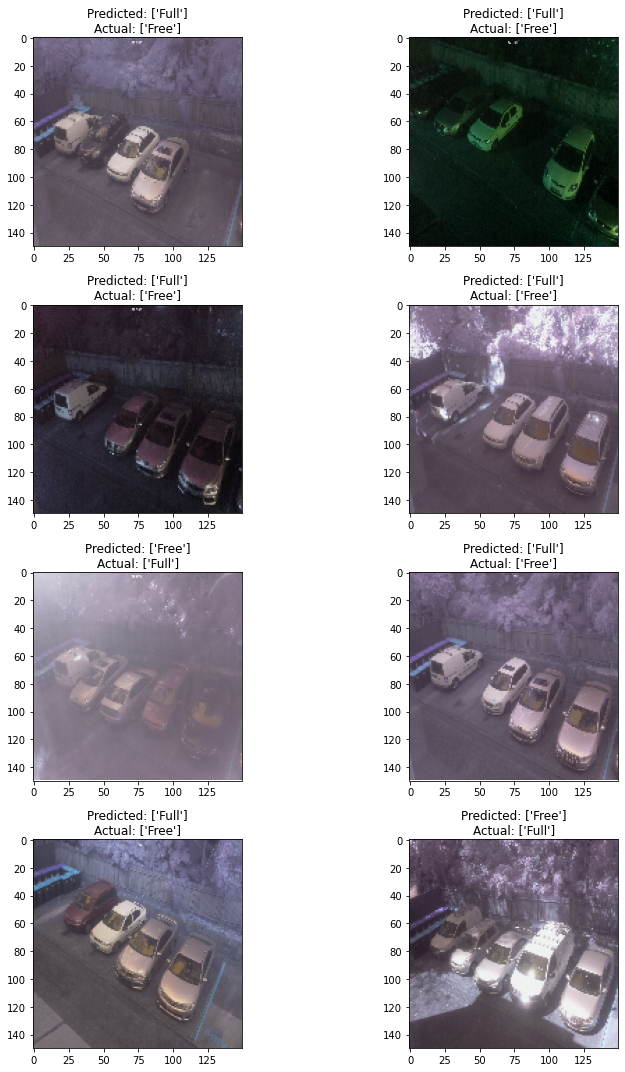

In [29]:
# predicted wrong (show 8 images)
warnings.filterwarnings('always', 'ignore')

count = 0
fig, ax = plt.subplots(4, 2)
fig.set_size_inches(12, 15)
for i in range (4):
    for j in range (2):
        ax[i, j].imshow(X_valid[mis_class[count]])
        ax[i, j].set_title("Predicted: "+str(le.inverse_transform([pred_digits[mis_class[count]]]))
                           +"\nActual: "+str(le.inverse_transform([np.argmax([y_valid[mis_class[count]]])])))
        count += 1
plt.tight_layout()

In [30]:
# accuracy
print('validation에 대한 분류 정확도:', round(acc/len(y_valid), 2))

validation에 대한 분류 정확도: 0.88


## Testing
학습에 사용된 이미지와 유사한 각도의 주차장 이미지 수집
- 구글에서 Full과 Free 각각 50장의 이미지 수집
- 분류 정확도를 확인하기 위해 클래스 분류
- 이미지 크롭, 파일 확장자 통일, 파일명 통일 등 전처리 완료

In [31]:
# directory
test_Free_DIR = os.path.join(data_DIR, 'random_Free')
test_Full_DIR = os.path.join(data_DIR, 'random_Full')

In [32]:
# setting
test_X = [] # store image array
test_Z = [] # store image label

In [33]:
# load data
img_load(test_X, test_Z, 'Free', test_Free_DIR)
print(len(test_X))

img_load(test_X, test_Z, 'Full', test_Full_DIR)
print(len(test_X))

  0%|          | 0/50 [00:00<?, ?it/s]

50


100%|██████████| 50/50 [00:00<00:00, 50.24it/s]

100


In [34]:
# check test_X
print('전체 이미지 수:', len(test_X))
print('세로:', len(test_X[1]))
print('가로:', len(test_X[1][1]))
print('세로x가로 첫번째 픽셀값:', test_X[1][1][1]) # pixcel values for each color channels (RGB)

전체 이미지 수: 100
세로: 150
가로: 150
세로x가로 첫번째 픽셀값: [59 65 61]


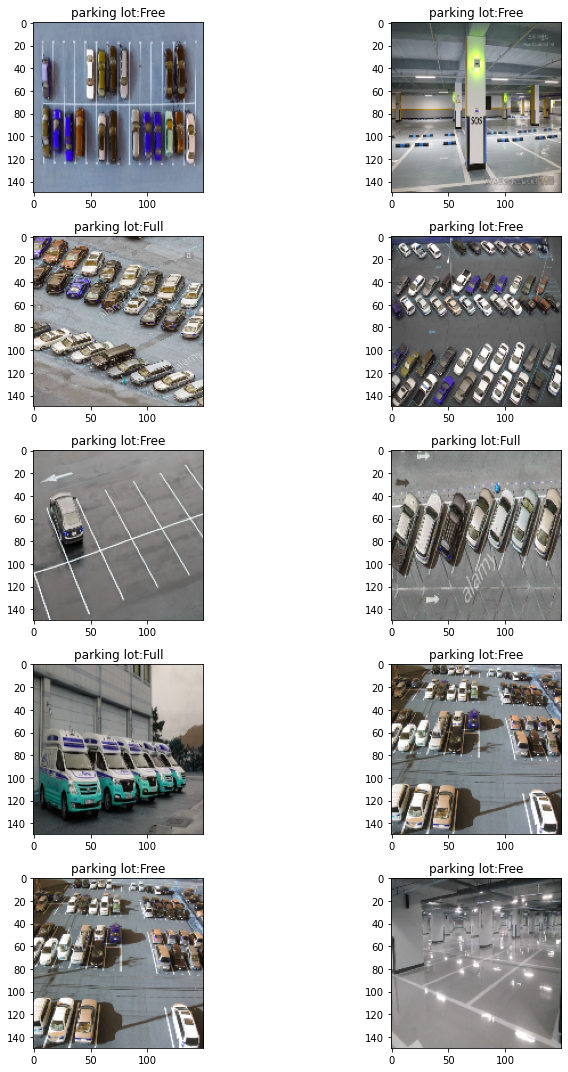

In [35]:
# check 10 random images
fig, ax = plt.subplots(5, 2)
fig.set_size_inches(12, 15)

for i in range(5):
    for j in range(2):
        num = random.randint(0, len(test_X)) # select random image number
        
        ax[i, j].imshow(test_X[num])                   # load image
        ax[i, j].set_title('parking lot:'+test_Z[num]) # attach label

plt.tight_layout()

In [36]:
# label encoder
le = LabelEncoder()
test_Y = le.fit_transform(test_Z)
test_Y = to_categorical(test_Y, 2)


# convert test_X
test_X = np.array(test_X) # copy
test_X = test_X/255       # convert values into range 0~1


# predict test_X
test_pred = model.predict(test_X)
test_pred_digits = np.argmax(test_pred, axis=1)


# classified indexes
i = 0
test_acc = 0
test_prop_class = []
test_mis_class = []

for i in range(len(test_Y)):
    if(np.argmax(test_Y[i]) == test_pred_digits[i]):  # if actual and prection has same index
        test_prop_class.append(i)                     # predicted properly
        test_acc += 1                                 # count
    else:
        test_mis_class.append(i)                      # predicted wrong

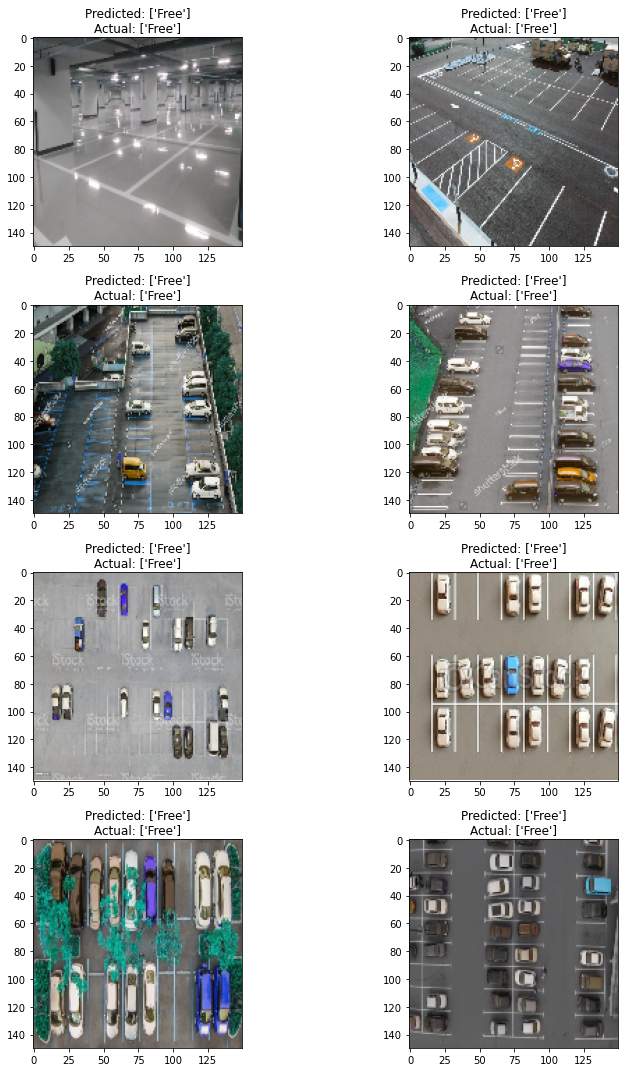

In [37]:
# predicted properly (show 8 images)
warnings.filterwarnings('always', 'ignore')

count = 0
fig, ax = plt.subplots(4, 2)
fig.set_size_inches(12, 15)
for i in range (4):
    for j in range (2):
        ax[i, j].imshow(test_X[test_prop_class[count]])
        ax[i, j].set_title("Predicted: "+str(le.inverse_transform([test_pred_digits[test_prop_class[count]]]))
                           +"\nActual: "+str(le.inverse_transform([np.argmax([test_Y[test_prop_class[count]]])])))
        count += 1
plt.tight_layout()

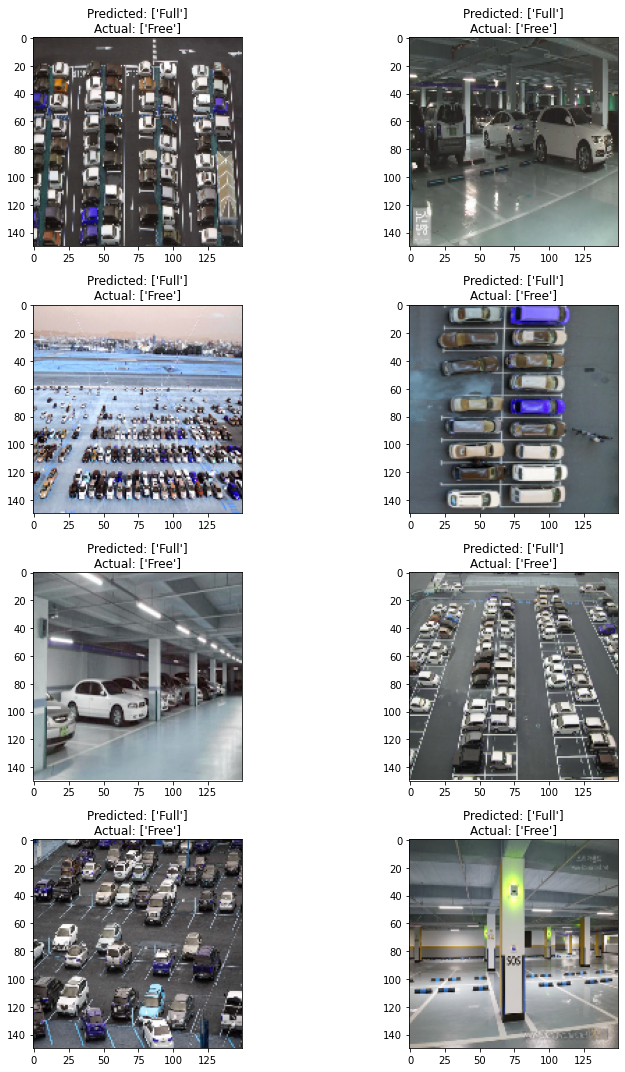

In [38]:
# predicted wrong (show 8 images)
warnings.filterwarnings('always', 'ignore')

count = 0
fig, ax = plt.subplots(4, 2)
fig.set_size_inches(12, 15)
for i in range (4):
    for j in range (2):
        ax[i, j].imshow(test_X[test_mis_class[count]])
        ax[i, j].set_title("Predicted: "+str(le.inverse_transform([test_pred_digits[test_mis_class[count]]]))
                           +"\nActual: "+str(le.inverse_transform([np.argmax([test_Y[test_mis_class[count]]])])))
        count += 1
plt.tight_layout()

In [39]:
# accuracy
print('랜덤 이미지에 대한 분류 정확도:', round(test_acc/len(test_Y), 2))

랜덤 이미지에 대한 분류 정확도: 0.62


참고
- [CNN, Convolutional Neural Network 요약, *TAEWAN.KIM 블로그*](http://taewan.kim/post/cnn/)
- [케라스 CNN을 활용한 비행기 이미지 분류하기, *갈루아의 반서재*](https://antilibrary.org/1980)
- [[keras]자신만의 이미지 데이터로 CNN 적용해보기, *흰고래의꿈*](https://twinw.tistory.com/252)
- [이미지 전처리 ImgaeDataGenerator 클래스, *Keras Documentation*](https://keras.io/ko/preprocessing/image/)